# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
import cartopy
from scipy.stats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
#from eofs.xarray import Eof 

In [2]:
import cftime
import scipy

In [3]:
import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils')

import make_multisimulation_dataset

In [4]:
from load_ensembles import *
import quick_map

In [5]:
from load_gridcell_areas import *

In [6]:
path_in='/glade/work/czarakas/coupled_PPE/data/data_for_figures/'

# Load data

### Land Only

In [7]:
ds_Ts_land = xr.open_dataset(path_in+'annual_means/delta_TSKIN_Annual_mean_coupled.nc')['TSKIN']
pvals_Ts_land=xr.open_dataset(path_in+'annual_means/pval_TSKIN_Annual_mean_coupled.nc')['pval']

ds_ref_land=xr.open_dataset(path_in+'annual_means/ref_TSKIN_Annual_mean_coupled.nc')['TSKIN']

### Land and Ocean

In [8]:
ds_Ts_global = xr.open_dataset(path_in+'annual_means/delta_TS_Annual_mean_coupled.nc')['TS']
pvals_Ts_global=xr.open_dataset(path_in+'annual_means/pval_TS_Annual_mean_coupled.nc')['pval']

ds_ref_global=xr.open_dataset(path_in+'annual_means/ref_TS_Annual_mean_coupled.nc')['TS']

In [9]:
ds_P = xr.open_dataset(path_in+'annual_means/delta_calculated_PREC_FROM_ATM_Annual_mean_coupled.nc')['calculated_PREC_FROM_ATM']
pvals_P=xr.open_dataset(path_in+'annual_means/pval_calculated_PREC_FROM_ATM_Annual_mean_coupled.nc')['pval']

ds_ref=xr.open_dataset(path_in+'annual_means/ref_calculated_PREC_FROM_ATM_Annual_mean_coupled.nc')['calculated_PREC_FROM_ATM']

### Reindex weights as needed

In [10]:
landweights_atm=landweights2.reindex_like(ds_ref_global, method='nearest',tolerance=0.05)
weight_factor_atm=weight_factor_atm.reindex_like(ds_ref_global, method='nearest',tolerance=0.05)

landweights_lnd=landweights2.reindex_like(ds_ref_land, method='nearest',tolerance=0.05)
weight_factor_lnd=weight_factor_atm.reindex_like(ds_ref_land, method='nearest',tolerance=0.05)

# Make figure

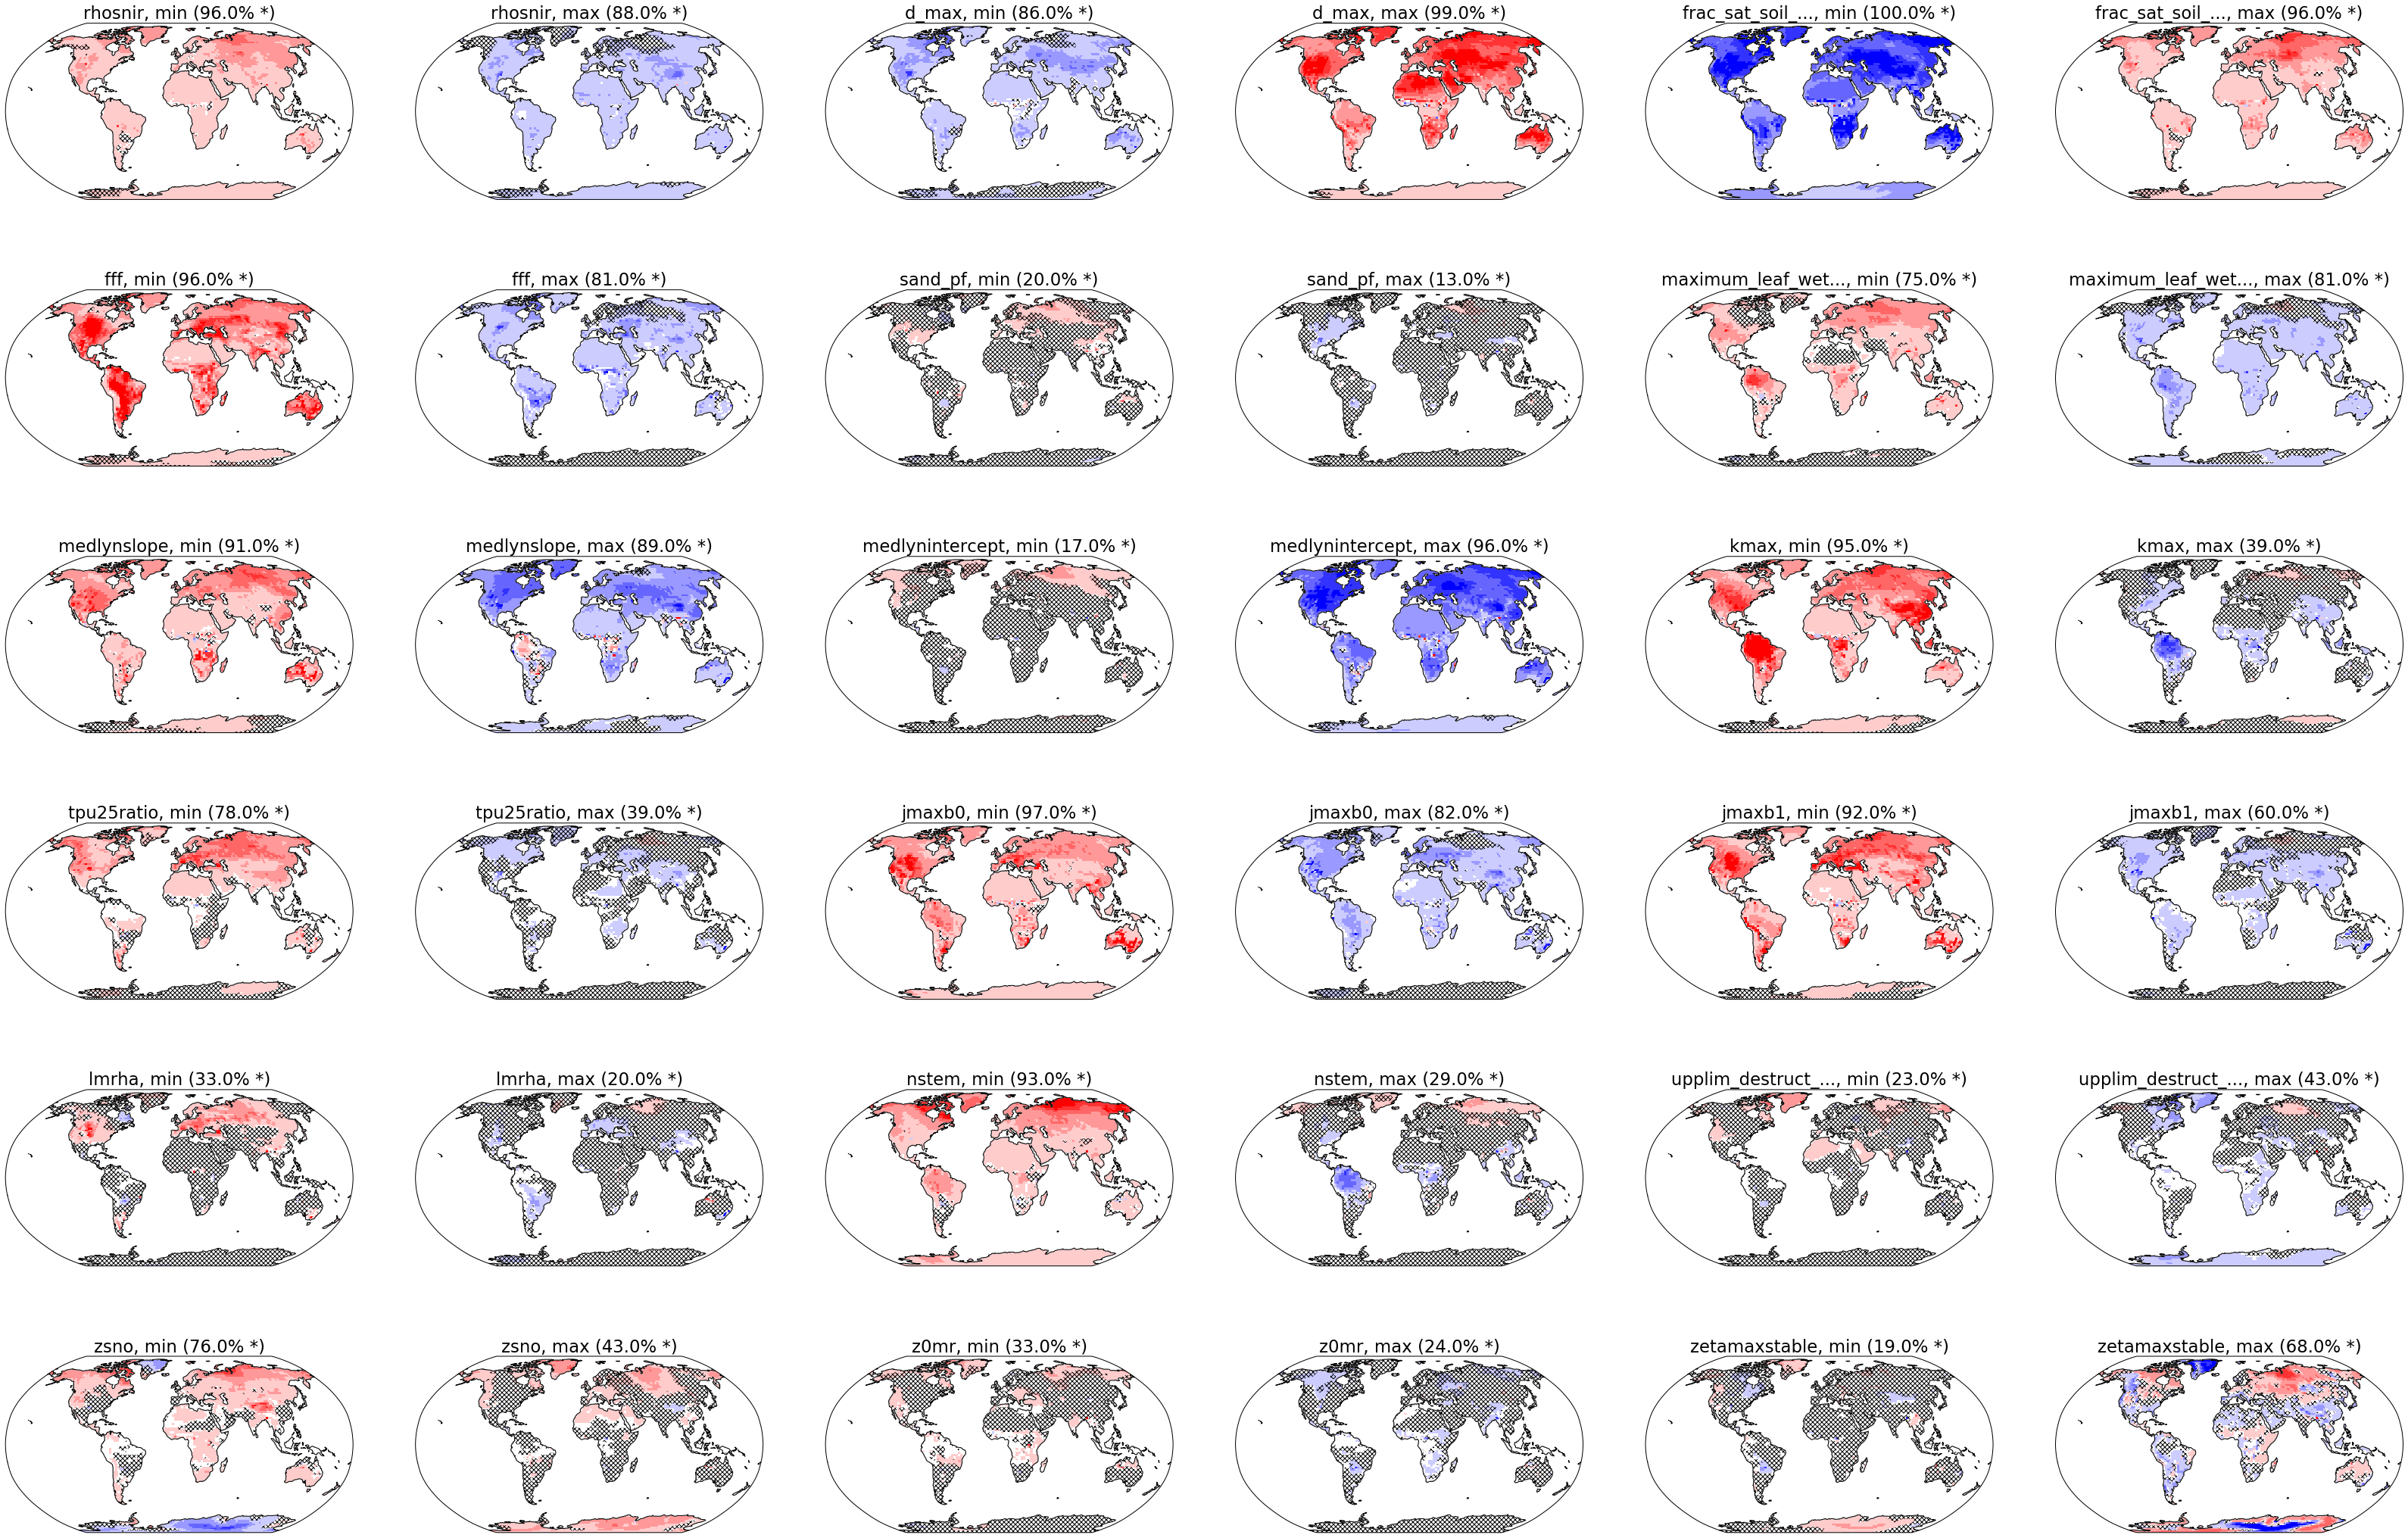

In [19]:
plt.rcParams.update({'font.size': 19})
fig = plt.figure(figsize=(45,30))
for j,i in enumerate(int_list):
    title=(crosswalk_descriptions_short[i]+' ('+
           str(np.round(fracs_changed_land[i]*100))+'% '+
           Walker_tests[i]+')'
          )

    plot_subplot(ds[:,:,i],ind=j+1, sigmask=sigmask[:,:,i],
                title=title,
                vmin=vmin, vmax=vmax, cmap=cmap)

plt.tight_layout()
plt.savefig('Figures/'+var+'_landOnly_'+'subplots.pdf')

In [11]:
from plotting_settings import *

In [36]:
global_Ts=(ds_Ts_global*weight_factor_atm).mean(dim=['lat','lon'])
land_Ts=(ds_Ts_land*landweights_lnd).sum(dim=['lat','lon'])

In [35]:
zeta_ind=(crosswalk.param=='zetamaxstable').values

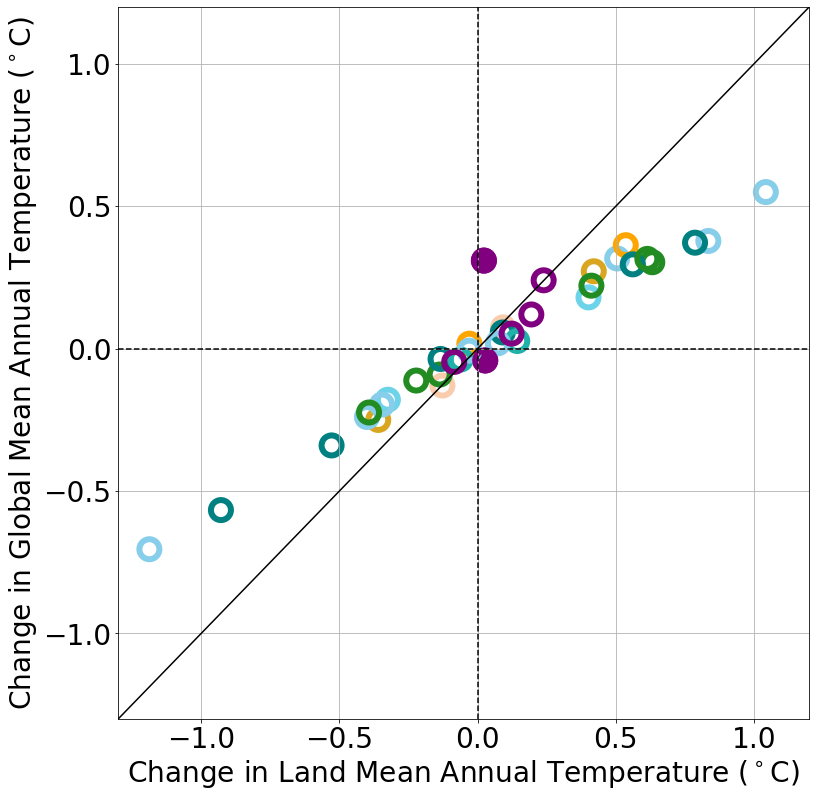

In [39]:
minval=-1.3
maxval=1.2
plt.rcParams.update({'font.size': 28})

plt.figure(figsize=(12,12))

plt.scatter(land_Ts[zeta_ind], global_Ts[zeta_ind], s=400, 
            c=np.array(colors)[zeta_ind],
            linewidth=6)
plt.plot([minval,maxval],[minval,maxval],'-k')
plt.scatter(land_Ts, global_Ts, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('Change in Land Mean Annual Temperature ($^\circ$C)')
plt.ylabel('Change in Global Mean Annual Temperature ($^\circ$C)')
plt.xlim([minval,maxval])
plt.ylim([minval,maxval])
plt.tight_layout()
plt.savefig('Figures/Figure_S3.pdf')

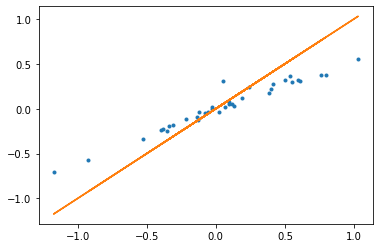

In [19]:
plt.plot(land_Ts, global_Ts,'.')
plt.plot(land_Ts,land_Ts,'-')